# Exercícios - Aula 1

In [88]:
# Importa as bibliotecas que vão ser usadas durante os exercícios

import random
random.seed(1)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.kde import gaussian_kde

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')

## Q1 - Leia os dados com erro novamente, faça a limpeza e remova as duas últimas colunas.

In [6]:
data = pd.read_csv('data/iris-with-errors.csv', header=(0))

data.head(25)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


In [7]:
data = data.drop(data.columns[[-1, -2]], axis = 1)
data = data.replace("?", np.nan)
data = data.dropna()

data.head(25)

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,5.1,3.5,1.4
3,4.7,3.2,1.3
4,5.1,3.5,1.4
6,5,3.6,1.4
7,5.4,3.9,1.7
8,5.4,3.9,1.7
9,4.6,3.4,1.4
10,5,3.4,1.5
11,4.4,2.9,1.4


## Q2 - Leia os dados com erro novamente e insira a mediana de cada atributo onde for encontrada NaN.

In [10]:
data = pd.read_csv('data/iris-with-errors.csv', header=(0))

# Retira os dados duplicados
data = data.drop_duplicates()
# Transforma os caracteres '?' em nan
data = data.replace('?', np.nan)

# Transforma os dados em uma numpy array sem ter a última coluna
X = np.array(data[data.columns[0:data.shape[1]-1]], dtype = float).T

X, X.shape

(array([[5.1, nan, 4.7, nan, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
         4.3, 5.8, 5.7, 5.4, 5.1, 5.7, nan],
        [3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
         3. , 4. , 4.4, 3.9, 3.5, nan, 3.8],
        [1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
         1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5],
        [0.2, 0.2, 0.2, 0.2, 0.2, 0.4, nan, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
         0.1, 0.2, 0.4, nan, 0.3, 0.3, 0.3]]),
 (4, 20))

In [11]:
# Agora vamos calcular a mediana de cada coluna
X_medians = np.nanmedian(X, axis = 1)

X_medians

array([5. , 3.4, 1.4, 0.2])

In [12]:
# Troca os valores com NAN pela mediana

for i in range(X.shape[0]):
    where_is_nan = np.isnan(X[i])
    X[i][where_is_nan] = X_medians[i]

    print(where_is_nan)
    print(X[i])

[False  True False  True False False False False False False False False
 False False False False False False False  True]
[5.1 5.  4.7 5.  5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5. ]
[False False False False False False False False False False False False
 False False False False False False  True False]
[3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
 3.4 3.8]
[False False False False False False False False False False False False
 False False False False False False False False]
[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5]
[False False False False False False  True False False False False False
 False False False False  True False False False]
[0.2 0.2 0.2 0.2 0.2 0.4 0.2 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.2 0.3
 0.3 0.3]


## Q3 - Considere os dados da Iris e mostre a distribuição de probabilidades de cada uma das variáveis após a normalização e padronização.

In [13]:
data = pd.read_csv('data/iris.csv', header=(0))

# Transforma os dados em uma numpy array sem ter a última coluna
X = np.array(data[data.columns[0:data.shape[1]-1]], dtype = float)

X.T, X.shape

(array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
         4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
         5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
         5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
         6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
         6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
         6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
         6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
         6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
         7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
         7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
         6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9],
        [3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
         3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4

In [14]:
# Processo de normalização dos dados

scaler = MinMaxScaler(feature_range=(0, 1))
# Os dados normalizados utilizando o normalizador do sklearn
X_norm = scaler.fit_transform(X)

X_norm.T

array([[0.22222222, 0.16666667, 0.11111111, 0.08333333, 0.19444444,
        0.30555556, 0.08333333, 0.19444444, 0.02777778, 0.16666667,
        0.30555556, 0.13888889, 0.13888889, 0.        , 0.41666667,
        0.38888889, 0.30555556, 0.22222222, 0.38888889, 0.22222222,
        0.30555556, 0.22222222, 0.08333333, 0.22222222, 0.13888889,
        0.19444444, 0.19444444, 0.25      , 0.25      , 0.11111111,
        0.13888889, 0.30555556, 0.25      , 0.33333333, 0.16666667,
        0.19444444, 0.33333333, 0.16666667, 0.02777778, 0.22222222,
        0.19444444, 0.05555556, 0.02777778, 0.19444444, 0.22222222,
        0.13888889, 0.22222222, 0.08333333, 0.27777778, 0.19444444,
        0.75      , 0.58333333, 0.72222222, 0.33333333, 0.61111111,
        0.38888889, 0.55555556, 0.16666667, 0.63888889, 0.25      ,
        0.19444444, 0.44444444, 0.47222222, 0.5       , 0.36111111,
        0.66666667, 0.36111111, 0.41666667, 0.52777778, 0.36111111,
        0.44444444, 0.5       , 0.55555556, 0.5 

In [15]:
# Agora vai ser aplicado a padronização dos dados
standard_scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

rescaledX.T

array([[0.22222222, 0.16666667, 0.11111111, 0.08333333, 0.19444444,
        0.30555556, 0.08333333, 0.19444444, 0.02777778, 0.16666667,
        0.30555556, 0.13888889, 0.13888889, 0.        , 0.41666667,
        0.38888889, 0.30555556, 0.22222222, 0.38888889, 0.22222222,
        0.30555556, 0.22222222, 0.08333333, 0.22222222, 0.13888889,
        0.19444444, 0.19444444, 0.25      , 0.25      , 0.11111111,
        0.13888889, 0.30555556, 0.25      , 0.33333333, 0.16666667,
        0.19444444, 0.33333333, 0.16666667, 0.02777778, 0.22222222,
        0.19444444, 0.05555556, 0.02777778, 0.19444444, 0.22222222,
        0.13888889, 0.22222222, 0.08333333, 0.27777778, 0.19444444,
        0.75      , 0.58333333, 0.72222222, 0.33333333, 0.61111111,
        0.38888889, 0.55555556, 0.16666667, 0.63888889, 0.25      ,
        0.19444444, 0.44444444, 0.47222222, 0.5       , 0.36111111,
        0.66666667, 0.36111111, 0.41666667, 0.52777778, 0.36111111,
        0.44444444, 0.5       , 0.55555556, 0.5 

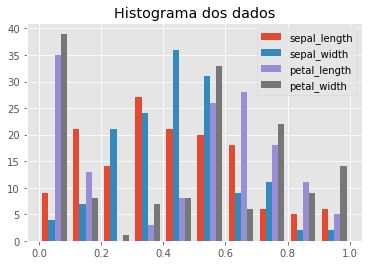

In [79]:
plt.hist(rescaledX, label = data.columns)
plt.title("Histograma dos dados")
plt.legend()
plt.show()

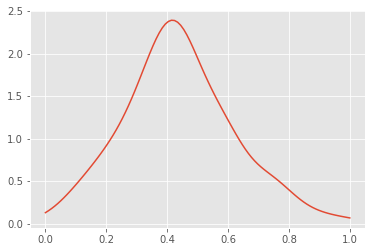

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [92]:
current_i = 1

kde = gaussian_kde(rescaledX.T[current_i])
lin_space = np.linspace(np.amin(rescaledX.T[current_i]), np.amax(rescaledX.T[current_i]), 100)
plt.plot(lin_space, kde(lin_space))
plt.show()

lin_space

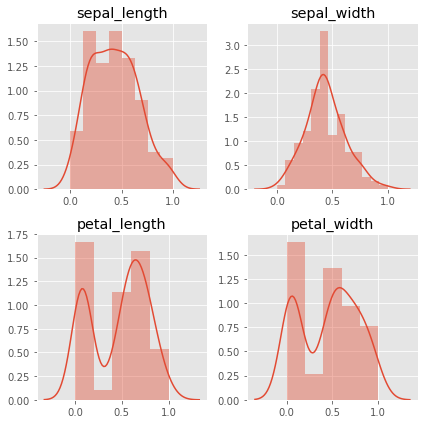

In [105]:
figure = plt.figure(figsize = (6, 6))
gridspec = figure.add_gridspec(2, 2)

for i in range(rescaledX.shape[1]):
    ax = figure.add_subplot(gridspec[int((i / 2) % 2), i % 2])
    column_plot = sns.distplot(rescaledX.T[i])
    column_plot.set_title(data.columns[i])

figure.tight_layout()

## Q4 - Reamostre os dados da Iris e selecione 10 elementos em cada classe.

In [90]:
data = pd.read_csv('data/iris.csv', header=(0))

# Vamos pegar todas as classes
classes = data[data.columns[-1]]
cl = np.unique(classes)

cl

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [107]:
dados_selecionados = data.head(0)

for classe in cl:
    dados_com_a_classe = data[data.columns[-1]] == classe
    dados_obtidos = data[dados_com_a_classe]

    dados_selecionados_aleatoriamente = dados_obtidos.sample(n = 10)

    dados_selecionados = dados_selecionados.append(dados_selecionados_aleatoriamente, ignore_index = True)


dados_selecionados

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.1,1.5,0.1,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.8,3.4,1.9,0.2,setosa
3,5.8,4.0,1.2,0.2,setosa
4,4.8,3.1,1.6,0.2,setosa
5,5.2,3.4,1.4,0.2,setosa
6,5.0,3.4,1.6,0.4,setosa
7,5.4,3.4,1.7,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.8,3.0,1.4,0.1,setosa
